<a href="https://colab.research.google.com/github/ahmed-hassan1997/Investigate_TMDb_Movies/blob/master/Investigate_a_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

## include important libraries for data analysis 

In [84]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

## import data and look ahead

In [85]:
df = pd.read_csv('/content/tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [86]:
# list columns 

columns = list(df.columns)

print("number of sample is : ", str(len(df)) + " row ")

print("columns in data is \n  ",columns)

print("number of columns is : ",str(len(columns)) + " columns")


number of sample is :  10866 row 
columns in data is 
   ['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']
number of columns is :  21 columns


### **observation about data** 

- we need to remove unused column 
- remove duplicated data
- fill NAN value with mean of this column
- Changing  date column to date format.




In [87]:
unwanted_col=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

df.drop(unwanted_col , axis = 1 , inplace = True)

df.head(2)


,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015


In [88]:
df.describe()

,budget,revenue,runtime,release_year
count,1.086600e+04,1.086600e+04,10866.000000,10866.000000
mean,1.462570e+07,3.982332e+07,102.070863,2001.322658
std,3.091321e+07,1.170035e+08,31.381405,12.812941
min,0.000000e+00,0.000000e+00,0.000000,1960.000000
25%,0.000000e+00,0.000000e+00,90.000000,1995.000000
50%,0.000000e+00,0.000000e+00,99.000000,2006.000000
75%,1.500000e+07,2.400000e+07,111.000000,2011.000000
max,4.250000e+08,2.781506e+09,900.000000,2015.000000


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   budget          10866 non-null  int64 
 1   revenue         10866 non-null  int64 
 2   original_title  10866 non-null  object
 3   cast            10790 non-null  object
 4   director        10822 non-null  object
 5   tagline         8042 non-null   object
 6   runtime         10866 non-null  int64 
 7   genres          10843 non-null  object
 8   release_date    10866 non-null  object
 9   release_year    10866 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 849.0+ KB


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

## drop duplicated

In [90]:
print("sum of the duplicated data is : ", sum(df.duplicated()))

sum of the duplicated data is :  1


In [91]:
df.drop_duplicates(inplace= True)
print("sum of the duplicated data is : ", sum(df.duplicated()))

sum of the duplicated data is :  0


## fill non value with mean

In [92]:
print("sum of the null value is : ",len(df.isnull().count()))
df.isnull().sum()

sum of the null value is :  10


budget               0
revenue              0
original_title       0
cast                76
director            44
tagline           2824
runtime              0
genres              23
release_date         0
release_year         0
dtype: int64

## because this data is categorical data and you want to drop it

In [93]:
df.dropna(inplace=True)
df.isnull().sum()

budget            0
revenue           0
original_title    0
cast              0
director          0
tagline           0
runtime           0
genres            0
release_date      0
release_year      0
dtype: int64

In [94]:
print(df.shape)

(8001, 10)


## fix data format

In [19]:
df.info()
df.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8001 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   budget          8001 non-null   int64 
 1   revenue         8001 non-null   int64 
 2   original_title  8001 non-null   object
 3   cast            8001 non-null   object
 4   director        8001 non-null   object
 5   tagline         8001 non-null   object
 6   runtime         8001 non-null   int64 
 7   genres          8001 non-null   object
 8   release_date    8001 non-null   object
 9   release_year    8001 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 687.6+ KB


,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015


In [153]:
df['runtime'] = df['runtime'].replace(0,np.NaN)

In [154]:
date = df[['release_date','release_year']].copy()
date.head(1)

,release_date,release_year
0,6/9/15,2015


In [156]:
date[['month','day','bad_year']] = date.release_date.str.split("/",expand=True) 
date.head(1)

,release_date,release_year,month,day,bad_year
0,6/9/15,2015,6,9,15


In [157]:
dates.dtypes



release_date    object
release_year    object
day             object
month           object
year            object
date            object
dtype: object

In [158]:
date["release_year"] = dates["release_year"].astype(str)
date.dtypes

release_date    object
release_year    object
month           object
day             object
bad_year        object
dtype: object

In [159]:
date['date'] = date['release_year'] + '-' + date['month'] + '-' + date['day']
date['date'] = pd.to_datetime(date['date'])

date.head(1)


,release_date,release_year,month,day,bad_year,date
0,6/9/15,2015,6,9,15,2015-06-09


In [160]:
date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8001 entries, 0 to 10865
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   release_date  8001 non-null   object        
 1   release_year  8001 non-null   object        
 2   month         8001 non-null   object        
 3   day           8001 non-null   object        
 4   bad_year      8001 non-null   object        
 5   date          8001 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 437.6+ KB


In [161]:
df['release_date'] = date['date']
df.head(1)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8001 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget          8001 non-null   int64         
 1   revenue         8001 non-null   int64         
 2   original_title  8001 non-null   object        
 3   cast            8001 non-null   object        
 4   director        8001 non-null   object        
 5   tagline         8001 non-null   object        
 6   runtime         7997 non-null   float64       
 7   genres          8001 non-null   object        
 8   release_date    8001 non-null   datetime64[ns]
 9   release_year    8001 non-null   int64         
 10  profit          8001 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 1.0+ MB


## check some info about data

In [163]:
df.isnull().sum()

budget            0
revenue           0
original_title    0
cast              0
director          0
tagline           0
runtime           4
genres            0
release_date      0
release_year      0
profit            0
dtype: int64

In [164]:
print("sum of duplicated data : " ,sum(df.duplicated()))

sum of duplicated data :  0


In [165]:
df.head(1)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810


In [166]:
df.to_csv('clean_data.csv' ,index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (what is max and min profit to films )

In [167]:
df['profit'] = df['revenue'] - df['budget']
max = df[df['profit'] == df['profit'].max()]
min = df[df['profit'] == df['profit'].min()]

print("id of max profit movie is  : " , max['director'])
print("min film in profit is by : ",min['director'])


id of max profit movie is  :  1386    James Cameron
Name: director, dtype: object
min film in profit is by :  2244    Sngmoo Lee
Name: director, dtype: object


### Research Question 2  (what is the max and min **revenue**)

1.   List item

> Indented block


2.   List item



In [169]:
max_revenue = df.revenue.max()
min_revenue = df.revenue.min()

print("max revenue is : ", max_revenue)


max revenue is :  2781505847


### Research Question 3  (what is shortest and high runtime of thsi movie![alt text](![alt text](https://)) **revenue**)

> Indented block

> Indented block






In [173]:
high_run_time = df['runtime'].max()
low_run_time  = df['runtime'].min()

print("high_run_time is : ", str(high_run_time) + " minutes")
print("low_run_time is : ", str(low_run_time)+ " minutes" )


high_run_time is :  877.0 minutes
low_run_time is :  3.0 minutes


### Research Question 4  (what is year high profit is found) 

---



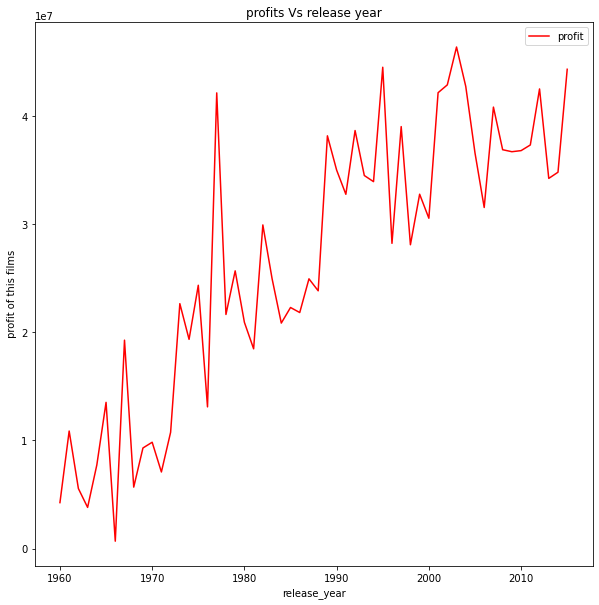

In [185]:
plt.figure(figsize=(10,10))
plt.xlabel(" year of production films")
plt.ylabel(" profit of this films")
plt.title ('profits Vs release year')
plt.legend('profit')

df.groupby('release_year').mean()['profit'].plot(color = 'red' ,legend = 'profit' )

### Research Question 5  (what is the  most geners in films) 

## split geners which separate with (|)


In [250]:
label = []
def data_split(column):
    #will take a column, and separate the string by '|'
    data = df[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    label = list(data)
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    print(count)
    
    return count

Drama              3495
Comedy             2857
Thriller           2396
Action             1940
Horror             1346
Romance            1269
Adventure          1187
Crime              1149
Science Fiction    1009
Family              861
Fantasy             710
Mystery             660
Animation           410
Music               273
Documentary         239
History             230
War                 206
Western             138
TV Movie             71
Foreign              67
dtype: int64


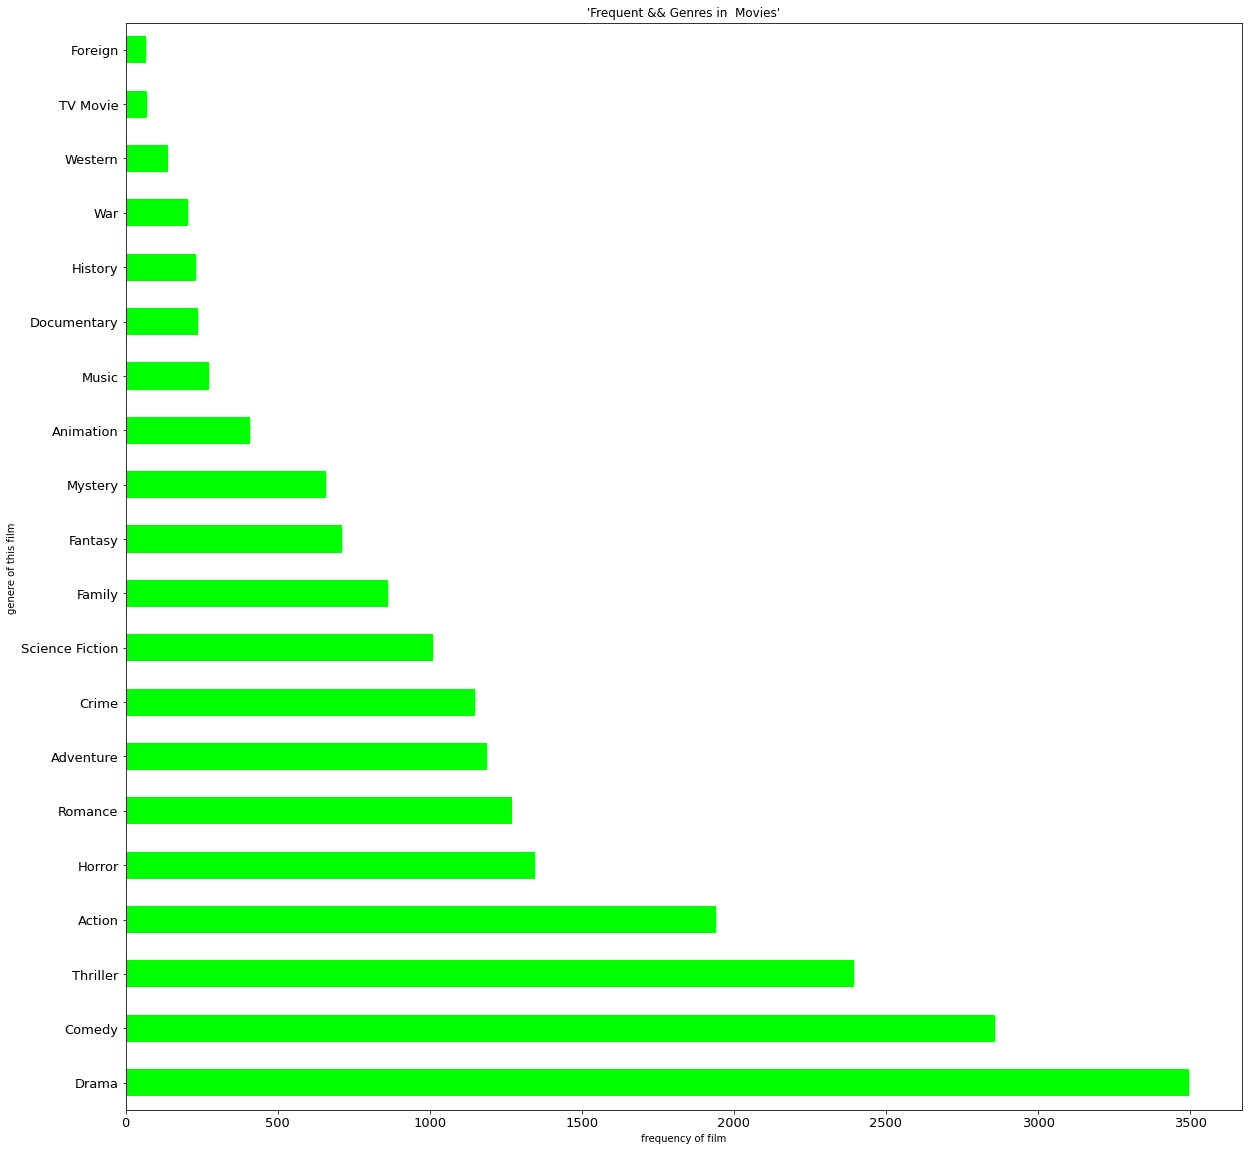

In [257]:
count = data_split('genres')

#ploting
plt.figure(figsize=(20,20))
plt.xlabel(' frequency of film ')
plt.ylabel('genere of this film ')
plt.title("'Frequent && Genres in  Movies'")
lt = count.plot.barh(color = '#00FF00', fontsize = 13)


## i want to know correlation between column 
- 1 positive correlation 

- -1 negative coorelation 

- 0 symetric

In [258]:
df.corr()

,budget,revenue,runtime,release_year,profit
budget,1.000000,0.730249,0.217709,0.176623,0.567801
revenue,0.730249,1.000000,0.192908,0.098914,0.977007
runtime,0.217709,0.192908,1.000000,-0.098836,0.164492
release_year,0.176623,0.098914,-0.098836,1.000000,0.064062
profit,0.567801,0.977007,0.164492,0.064062,1.000000


## draw heatmap
- confusion matrix between column

- this heat map show correlation between column and another 


Text(0.5, 1.0, 'correlation matrix for DataFrame')

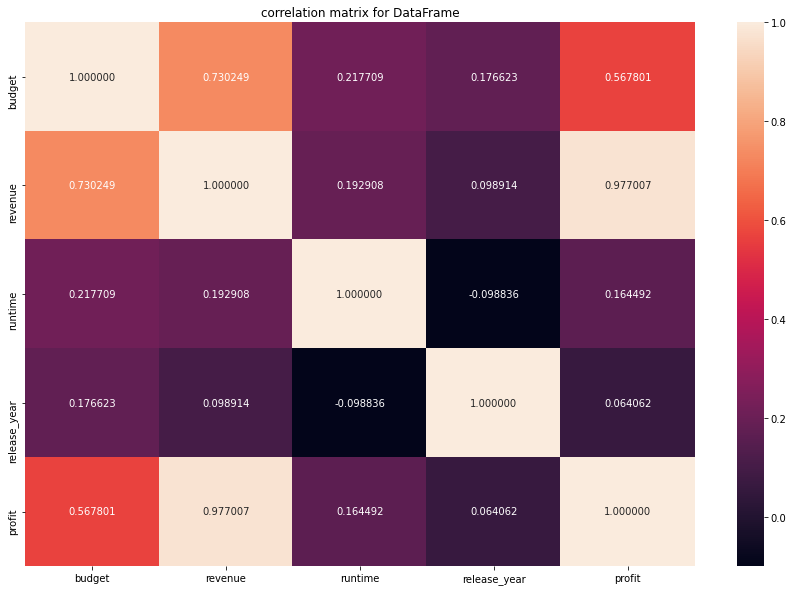

In [259]:
fig, ax = plt.subplots(figsize=(15,10))         
sns.heatmap(df.corr(), annot=True, fmt="f",ax=ax)
plt.title('correlation matrix for DataFrame')

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

In [ ]:
43 /7

6.142857142857143